In [19]:
import requests
import json
import csv
import pandas as pd

In [20]:
lat = "42.098701"
lon = "-75.912537"

genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file = genius.json()
json_file

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/42.0987,-75.9125',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-75.9125, 42.0987]},
 'properties': {'@id': 'https://api.weather.gov/p

In [21]:
forecast = json_file["properties"]["forecast"]
new_request = requests.get(forecast)

json = new_request.json()
json

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#'}],
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-75.9315877, 42.1111321],
    [-75.9357021, 42.0895688],
    [-75.9066508, 42.0865146],
    [-75.90253039999999, 42.1080777],
    [-75.9315877, 42.1111321]]]},
 'properties': {'updated': '2023-03-20T19:22:17+00:00',
  'units': 'us',
  'forecastGenerator': 'BaselineForecastGenerator',
  'generatedAt': '2023-03-20T20:36:31+00:00',
  'updateTime': '2023-03-20T19:22:17+00:00',
  'validTimes': '2023-03-20T13:00:00+00:00/P8D',
  'elevation': {'unitCode': 'wmoUnit:m', 'value': 274.0152},
  'periods': [{'number': 1,
    'name': 'This Afternoon',
    'startTime': '2023-03-20T16:00:00-04:00',
    'endTime': '2023-03-20T18:00:00-04:00',
   

In [22]:
a = json["properties"]["periods"]
a

for i in a:
    day = i["name"]
    temperature = i["temperature"]
    description = i["detailedForecast"]
    print(day)
    print(temperature)
    print(description)

This Afternoon
52
Sunny, with a high near 52. West wind around 12 mph.
Tonight
30
Mostly clear, with a low around 30. Southwest wind 5 to 9 mph.
Tuesday
55
Mostly sunny, with a high near 55. Southwest wind 6 to 10 mph.
Tuesday Night
33
Mostly cloudy, with a low around 33. Southeast wind 2 to 8 mph.
Wednesday
56
A slight chance of rain showers after 2pm. Mostly cloudy, with a high near 56. Southeast wind 2 to 10 mph. Chance of precipitation is 20%.
Wednesday Night
44
A chance of rain showers. Mostly cloudy, with a low around 44. Chance of precipitation is 40%.
Thursday
60
Rain showers likely. Cloudy, with a high near 60. Chance of precipitation is 70%.
Thursday Night
38
Rain showers likely. Cloudy, with a low around 38. Chance of precipitation is 70%.
Friday
47
A chance of rain showers. Cloudy, with a high near 47. Chance of precipitation is 50%.
Friday Night
34
A chance of rain before 1am, then a chance of rain and snow. Mostly cloudy, with a low around 34. Chance of precipitation is 5

In [24]:
data_file = open("weather_data.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(data_file)
csv_writer.writerow(["name", "temperature", "description"])

a = json["properties"]["periods"]
a

for i in a:
    day = i["name"]
    temperature = i["temperature"]
    description = i["detailedForecast"]
        
    csv_writer.writerow([day, temperature, description])
        
data_file.close()

In [26]:
sheet = pd.read_csv("weather_data.csv")
sheet

,name,temperature,description
0,This Afternoon,52,"Sunny, with a high near 52. West wind around 1..."
1,Tonight,30,"Mostly clear, with a low around 30. Southwest ..."
2,Tuesday,55,"Mostly sunny, with a high near 55. Southwest w..."
3,Tuesday Night,33,"Mostly cloudy, with a low around 33. Southeast..."
4,Wednesday,56,A slight chance of rain showers after 2pm. Mos...
5,Wednesday Night,44,"A chance of rain showers. Mostly cloudy, with ..."
6,Thursday,60,"Rain showers likely. Cloudy, with a high near ..."
7,Thursday Night,38,"Rain showers likely. Cloudy, with a low around..."
8,Friday,47,"A chance of rain showers. Cloudy, with a high ..."
9,Friday Night,34,"A chance of rain before 1am, then a chance of ..."


In [27]:
from matplotlib import pyplot as plt
import numpy as np

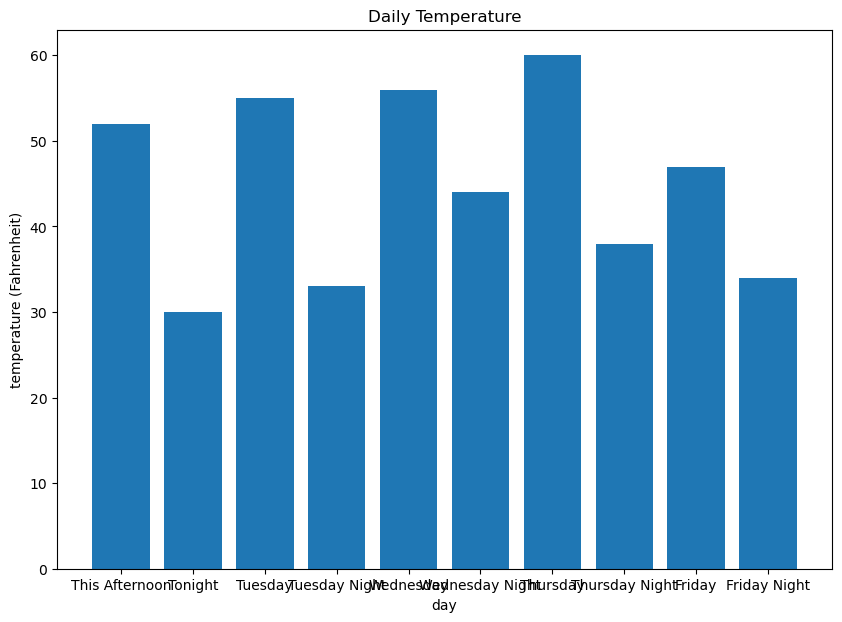

In [28]:
df=pd.DataFrame(sheet)

day = df["name"]
temperature = df["temperature"]

fig = plt.figure(figsize = (10, 7))
plt.bar(day[0:10], temperature[0:10])

plt.xlabel("day")
plt.ylabel("temperature (Fahrenheit)")
plt.title("Daily Temperature")

plt.show()